In [49]:
#1. Import the libraries
import os
import requests
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import pandas as pd
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sb
from datetime import date
plt.style.use('fivethirtyeight')

In [50]:
# Load .env environment variables
load_dotenv('keys.txt')

True

In [51]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [52]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [53]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [54]:
# Format current date as ISO format
today = pd.Timestamp("2022-07-14-", tz="America/New_York").isoformat()

In [55]:
end = pd.Timestamp("2023-04-16-", tz="America/New_York").isoformat()

In [64]:
# Set the tickers
tickers = ["TSLA", "LCID"]

In [70]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Dayr"

In [71]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = end
).df

# Display sample data
df_portfolio.head(3)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-07-14 04:00:00+00:00,19.44,20.15,18.96,20.11,12948493,76430,19.729493,LCID
2022-07-15 04:00:00+00:00,20.12,20.29,19.21,19.68,13949546,83028,19.616955,LCID
2022-07-18 04:00:00+00:00,20.07,21.08,19.86,19.96,17273803,112986,20.491635,LCID


In [72]:
# Reorganize the DataFrame

# Separate ticker data
TSLA = df_portfolio[df_portfolio['symbol']=='TSLA'].drop('symbol', axis=1)
LCID = df_portfolio[df_portfolio['symbol']=='LCID'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([TSLA, LCID],axis=1, keys=['TSLA','LCID'])

# Display sample data
df_portfolio

TSLA                                         \
                              open      high       low   close     volume   
timestamp                                                                   
2022-07-14 04:00:00+00:00  704.690  715.9600  688.0000  714.94   26188580   
2022-07-15 04:00:00+00:00  720.000  730.8699  710.6700  720.20   23228428   
2022-07-18 04:00:00+00:00  734.810  751.5500  718.8100  721.64   27666062   
2022-07-19 04:00:00+00:00  735.000  741.4200  710.9300  736.59   26956592   
2022-07-20 04:00:00+00:00  740.350  751.9900  730.4490  742.50   29720367   
...                            ...       ...       ...     ...        ...   
2023-04-10 04:00:00+00:00  179.940  185.1000  176.1100  184.51  142381979   
2023-04-11 04:00:00+00:00  186.690  189.1900  185.6475  186.79  115899024   
2023-04-12 04:00:00+00:00  190.740  191.5846  180.3100  180.54  150533520   
2023-04-13 04:00:00+00:00  182.955  186.5000  180.9400  185.90  112932963   
2023-04-14 04:00:00+00:00  183.950  186.2800  182.0100  185.00   95612183   

                                                    LCID                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2022-07-14 04:00:00+00:00      600569  701.677932  19.44  20.150  18.96   
2022-07-15 04:00:00+00:00      519686  719.023847  20.12  20.290  19.21   
2022-07-18 04:00:00+00:00      642641  738.602922  20.07  21.080  19.86   
2022-07-19 04:00:00+00:00      622879  729.507007  20.49  20.550  19.86   
2022-07-20 04:00:00+00:00      751727  744.954267  20.36  21.340  20.36   
...                               ...         ...    ...     ...    ...   
2023-04-10 04:00:00+00:00     1323071  181.071090   7.60   8.070   7.43   
2023-04-11 04:00:00+00:00     1075680  187.385543   8.08   8.685   8.06   
2023-04-12 04:00:00+00:00     1350516  184.481967   8.64   8.870   8.06   
2023-04-13 04:00:00+00:00      979661  184.824878   8.17   8.380   8.16   
2023-04-14 04:00:00+00:00      863516  184.006939   7.66   7.765   7.45   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2022-07-14 04:00:00+00:00  20.11  12948493       76430  19.729493  
2022-07-15 04:00:00+00:00  19.68  13949546       83028  19.616955  
2022-07-18 04:00:00+00:00  19.96  17273803      112986  20.491635  
2022-07-19 04:00:00+00:00  20.38  11279807       64493  20.377679  
2022-07-20 04:00:00+00:00  21.27  15247737       88505  20.921775  
...                          ...       ...         ...        ...  
2023-04-10 04:00:00+00:00   8.03  11553198       59164   7.794822  
2023-04-11 04:00:00+00:00   8.46  20659875       96139   8.453745  
2023-04-12 04:00:00+00:00   8.13  14105127       75911   8.316907  
2023-04-13 04:00:00+00:00   8.25  10570557       50085   8.204711  
2023-04-14 04:00:00+00:00   7.73  29988547      147923   7.581708  

[190 rows x 14 columns]

In [73]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["TSLA"] = df_portfolio["TSLA"]["close"]
df_closing_prices["LCID"] = df_portfolio["LCID"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

,TSLA,LCID
2022-07-14,714.94,20.11
2022-07-15,720.20,19.68
2022-07-18,721.64,19.96
2022-07-19,736.59,20.38
2022-07-20,742.50,21.27
2022-07-21,815.12,21.48
2022-07-22,816.73,19.68
2022-07-25,805.30,18.74
2022-07-26,776.58,18.09
2022-07-27,824.46,18.43


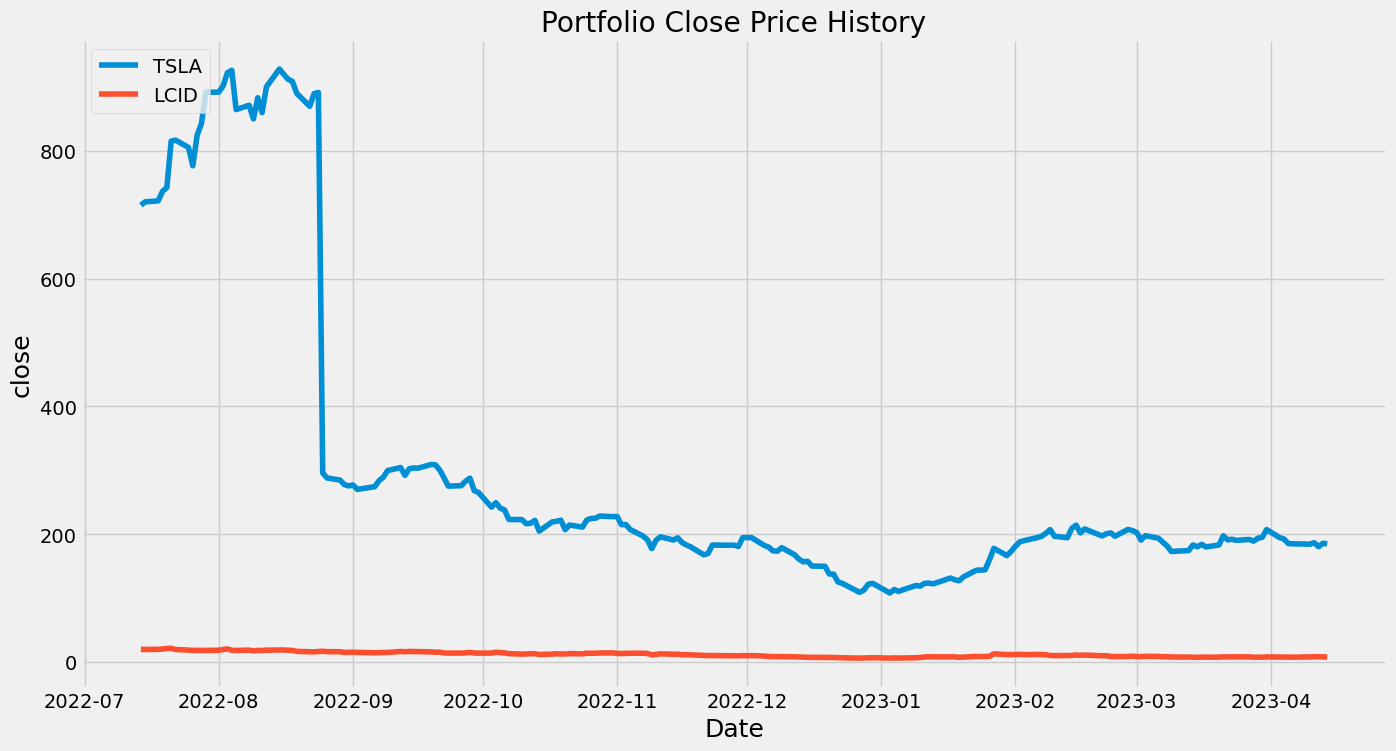

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df_closing_prices.columns.values :
    ax.plot(df_closing_prices[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('close' , fontsize=18)
ax.legend(df_closing_prices.columns.values , loc = 'upper left')
plt.show(fig)

In [75]:
correlation_matrix = df_closing_prices.corr(method='pearson')
correlation_matrix

,TSLA,LCID
TSLA,1.000000,0.805029
LCID,0.805029,1.000000


Correlation between Stocks in your portfolio


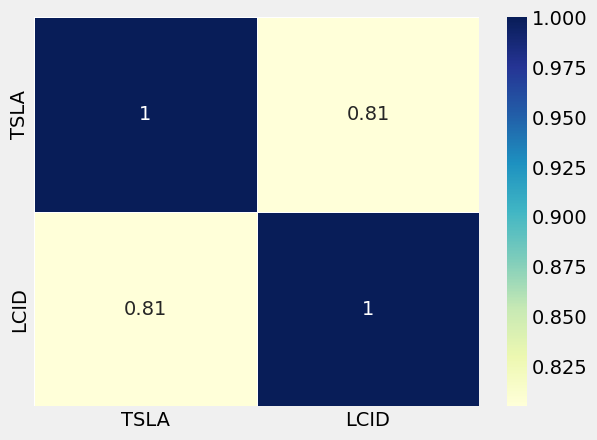

In [76]:
fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)

In [77]:
daily_simple_return = df_closing_prices.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return

,TSLA,LCID
2022-07-15,0.007357,-0.021382
2022-07-18,0.001999,0.014228
2022-07-19,0.020717,0.021042
2022-07-20,0.008023,0.043670
2022-07-21,0.097805,0.009873
...,...,...
2023-04-10,-0.002972,0.042857
2023-04-11,0.012357,0.053549
2023-04-12,-0.033460,-0.039007
2023-04-13,0.029689,0.014760


Daily simple returns


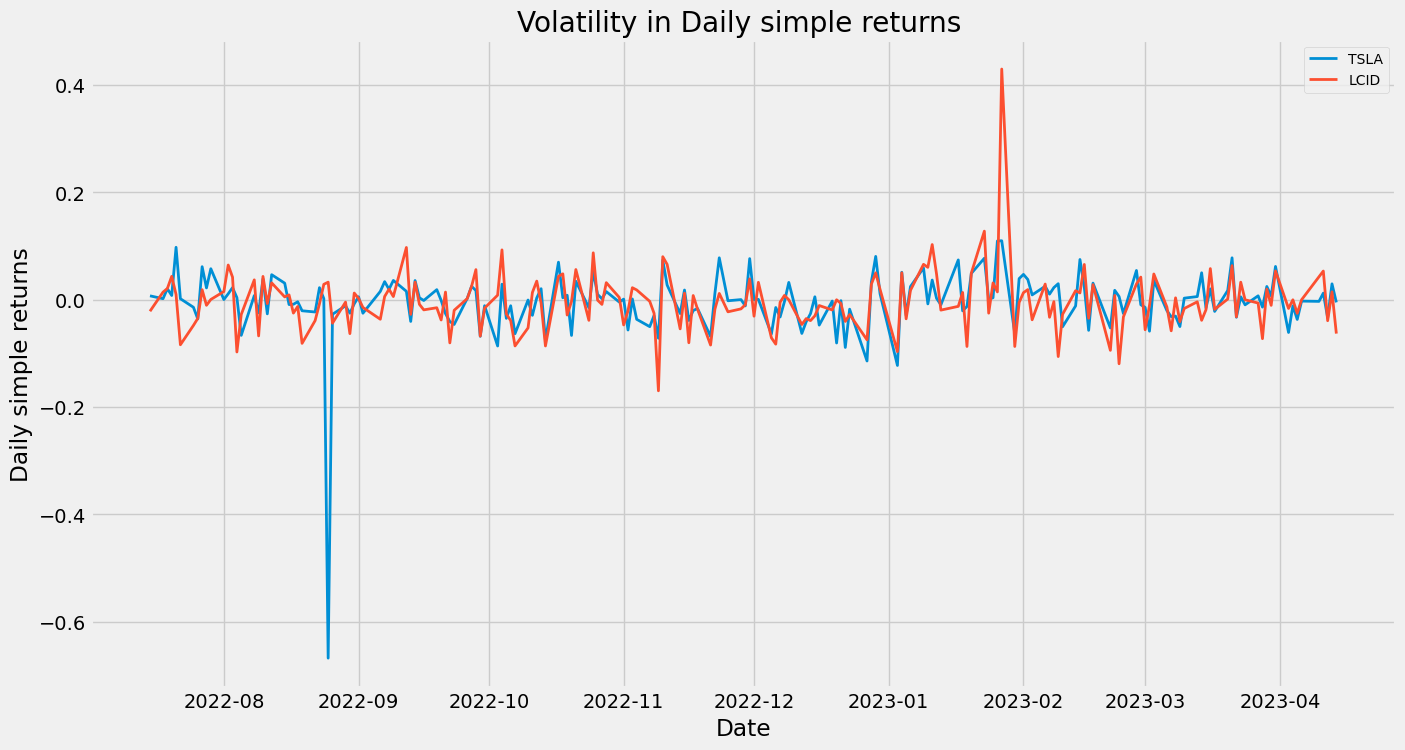

In [78]:
print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

In [79]:
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)

Average Daily returns(%) of stocks in your portfolio
TSLA   -0.405221
LCID   -0.361064
dtype: float64


<Axes: title={'center': 'Risk Box Plot'}>

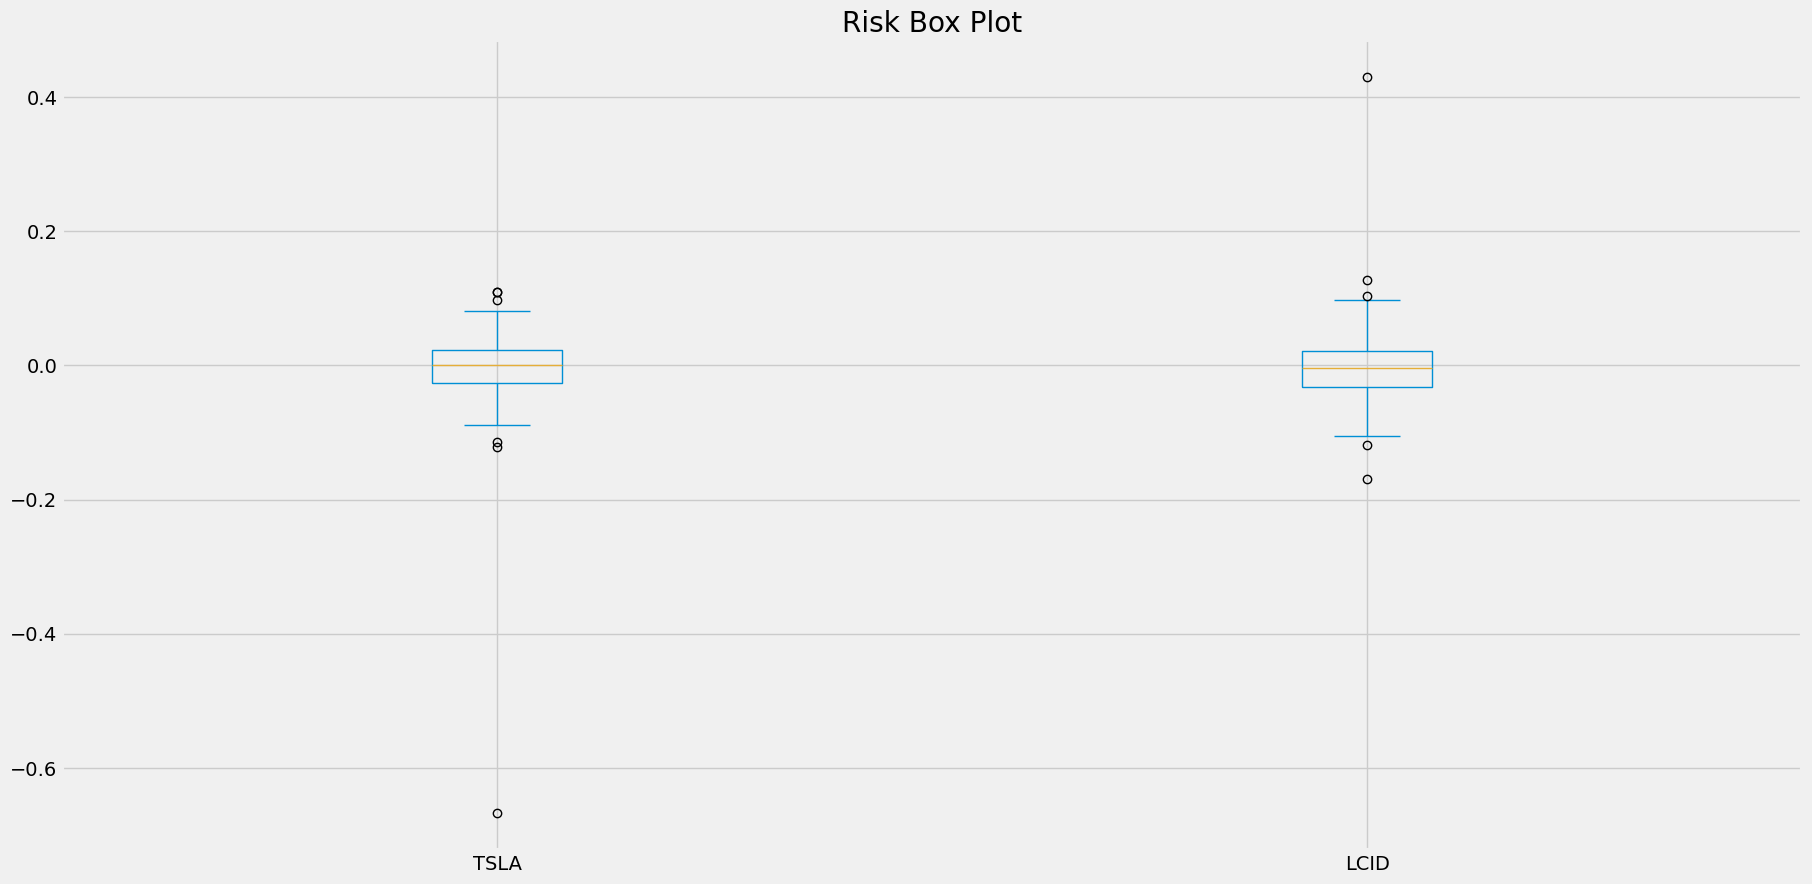

In [80]:
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")

In [81]:
Avg_daily / (daily_simple_return.std() * np.sqrt(252)) *100

TSLA   -0.405453
LCID   -0.410719
dtype: float64

In [82]:
daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
daily_cummulative_simple_return

,TSLA,LCID
2022-07-15,1.007357,0.978618
2022-07-18,1.009371,0.992541
2022-07-19,1.030282,1.013426
2022-07-20,1.038549,1.057683
2022-07-21,1.140124,1.068125
...,...,...
2023-04-10,0.258078,0.399304
2023-04-11,0.261267,0.420686
2023-04-12,0.252525,0.404276
2023-04-13,0.260022,0.410244


Cummulative Returns


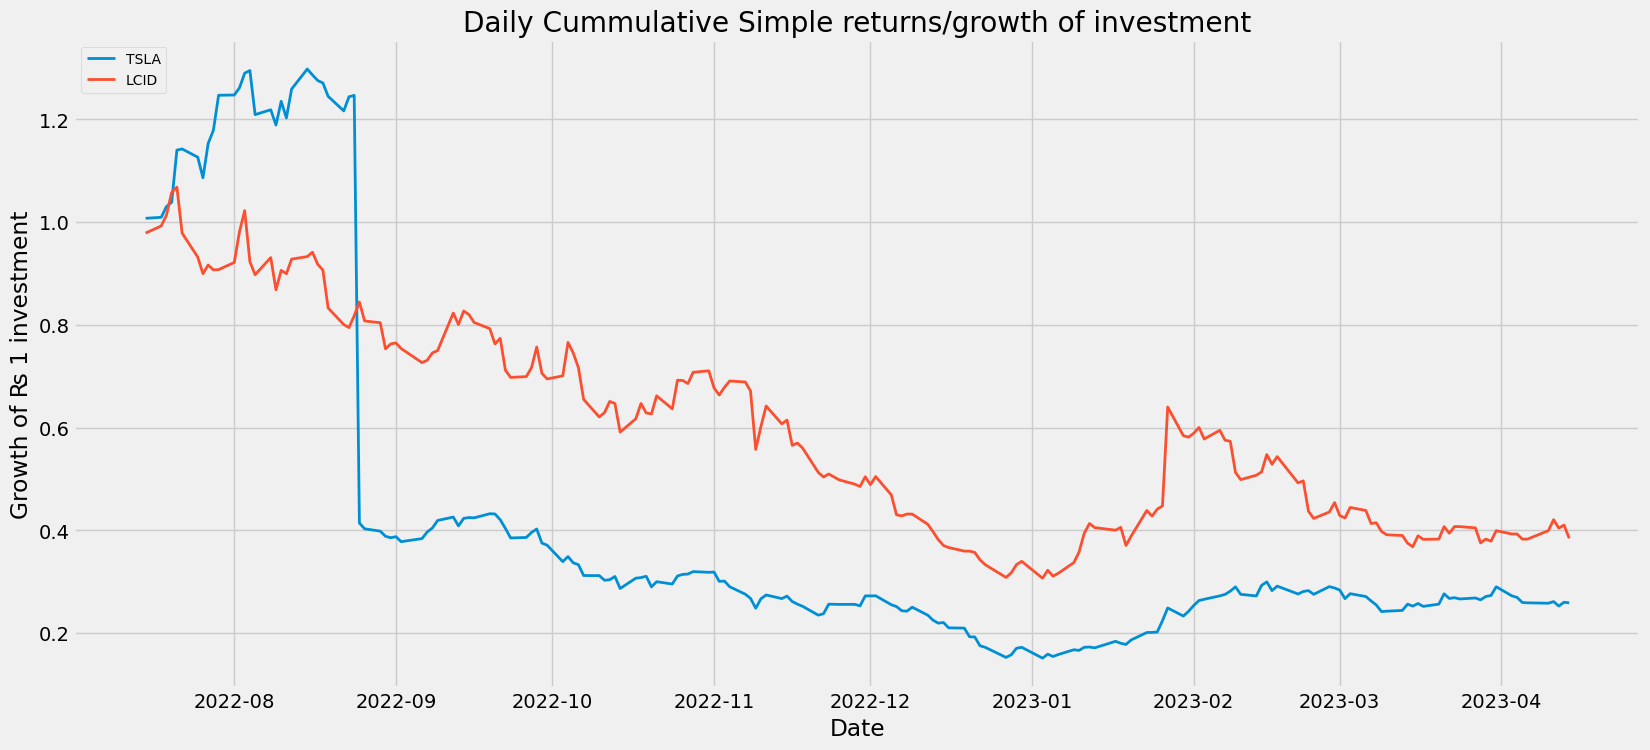

In [83]:
#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)